In [74]:
# Import needed libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
data = pd.read_excel("measurements2.xlsx")

## EDA

In [19]:
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [20]:
display(data.shape)

(388, 12)

In [21]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,376.0,21.929521,1.010455,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0
refill liters,13.0,37.115385,8.587282,10.0,37.60,38.0,39.0,45.0


In [24]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [29]:
data.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [31]:
data.gas_type.value_counts(dropna=False)

SP98    228
E10     160
Name: gas_type, dtype: int64

## Cleaning

In [32]:
df = data.drop(['specials', 'refill liters', 'refill gas'], axis=1).copy()

In [33]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [34]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
dtype: int64

In [39]:
# Fill NaN's

med_temp = df['temp_inside'].median()
df['temp_inside'] = df['temp_inside'].fillna(med_temp)

In [40]:
df.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [47]:
# Change data types

df["AC"] = df["AC"].astype(object)
df["rain"] = df["rain"].astype(object)
df["sun"] = df["sun"].astype(object)

In [48]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC               object
rain             object
sun              object
dtype: object

## Data Visualization

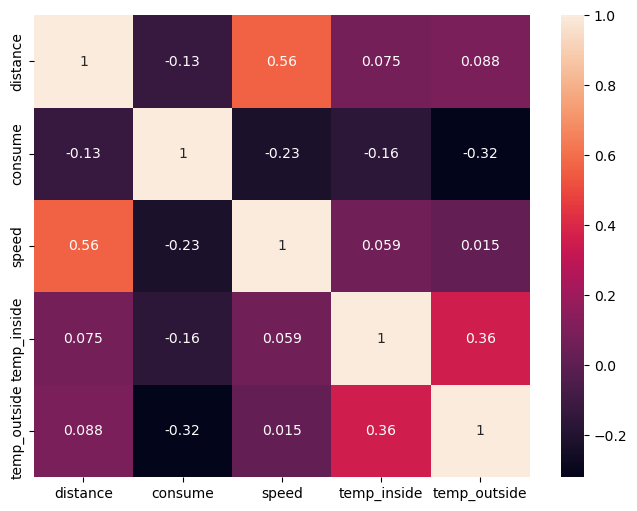

In [49]:
#multicollinearity
corr_matrix = df.corr(method='pearson')  #default
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

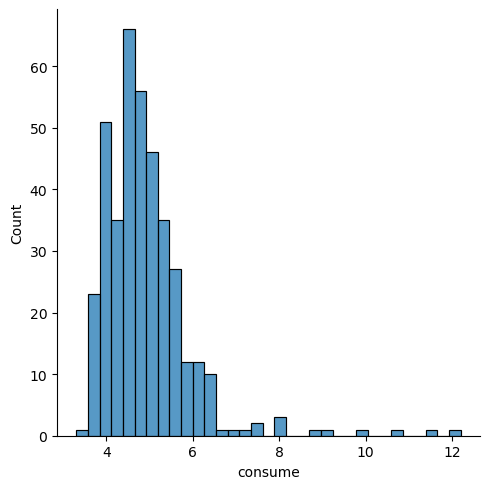

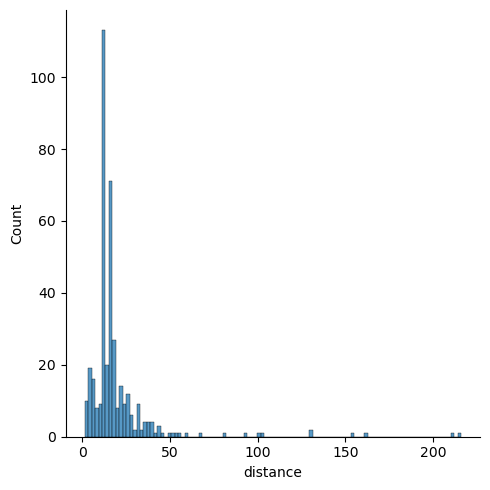

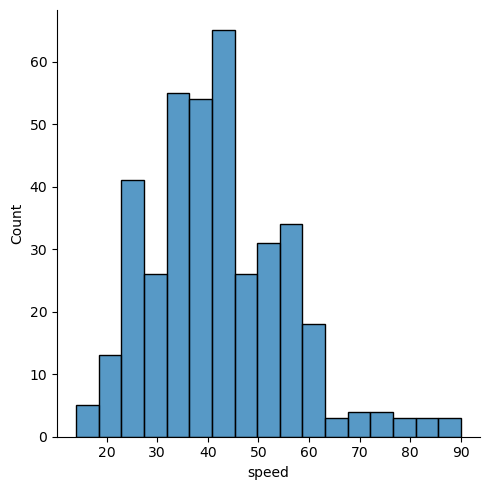

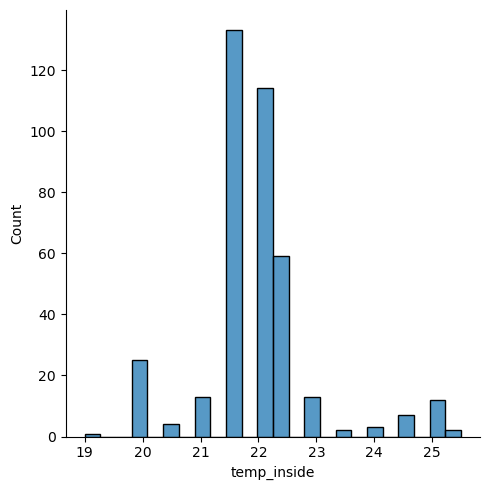

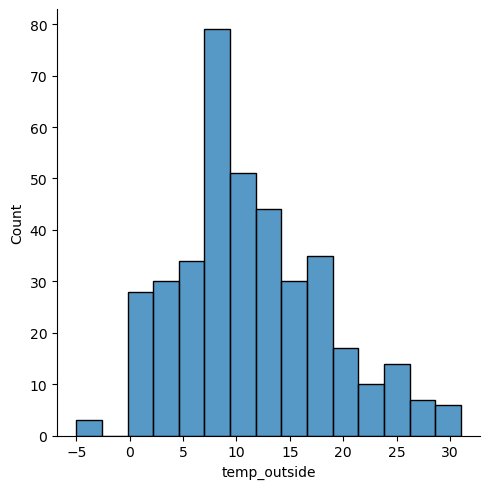

In [54]:
# check the normality of the numerical variables visually using distribution plots

sns.displot(df['consume'])
sns.displot(df['distance'])
sns.displot(df['speed'])
sns.displot(df['temp_inside'])
sns.displot(df['temp_outside'])

There seems to be a right skewed distribution for consumption and distance. Speed, temp_inside and temp_outside shows an almost normal distribution. 

### Comparing gas type and consumption

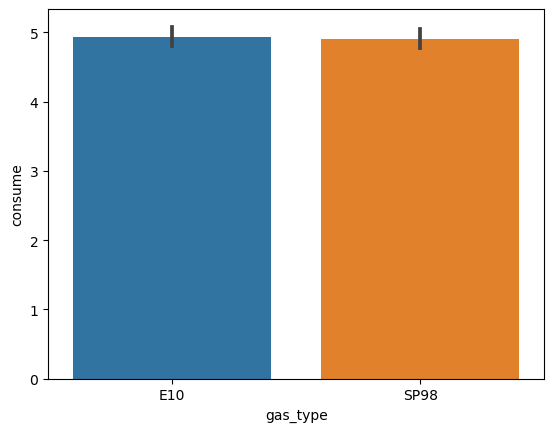

In [50]:
sns.barplot(x="gas_type", y="consume", data=df)
plt.show()

Text(0.5, 1.0, 'gas_type vs consume')

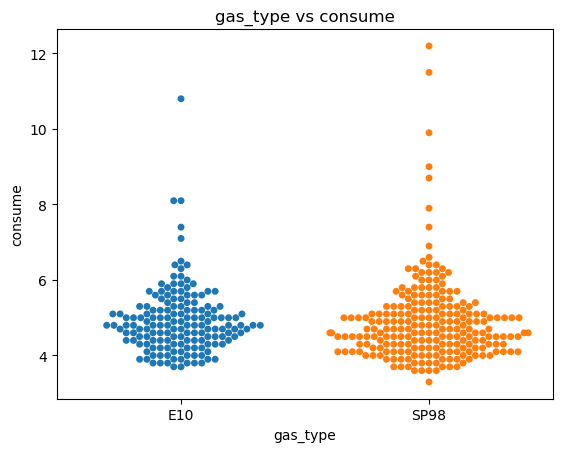

In [59]:
sns.swarmplot(x="gas_type", y="consume", data=df)
plt.title("gas_type vs consume")

### Comparing gas type, speed and consumption

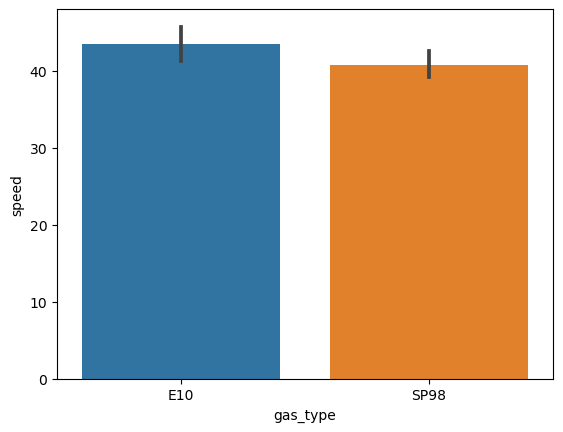

In [52]:
sns.barplot(x="gas_type", y="speed", data=df)
plt.show()

Text(0.5, 1.0, 'speed vs consume')

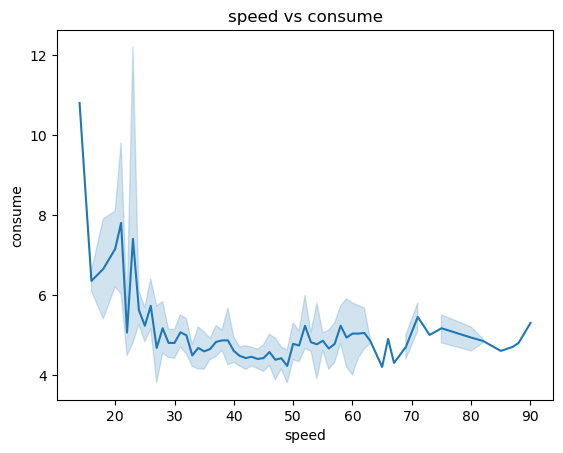

In [62]:
sns.lineplot(x="speed", y="consume", data=df)
plt.title("speed vs consume")

### Comparing gas type and distance

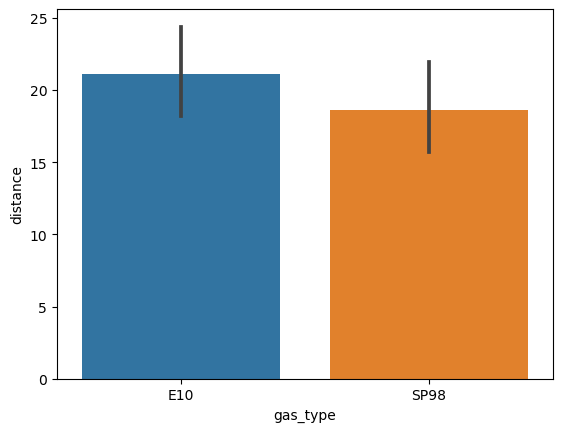

In [53]:
sns.barplot(x="gas_type", y="distance", data=df)
plt.show()

### Comparing temperature and consumption

Text(0.5, 1.0, 'temp_outside vs consume')

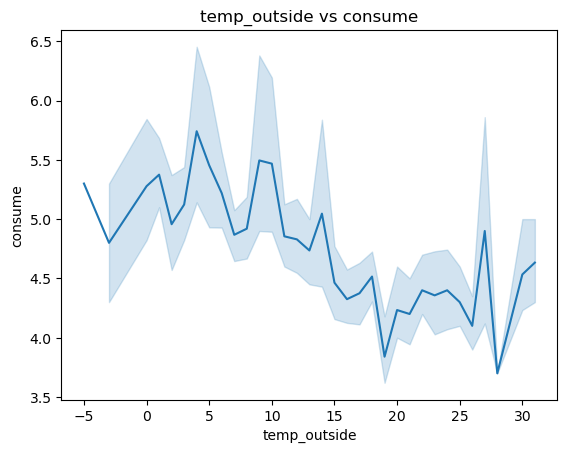

In [64]:
sns.lineplot(x="temp_outside", y="consume",data=df)
plt.title("temp_outside vs consume")

Text(0.5, 1.0, 'temp_inside vs consume')

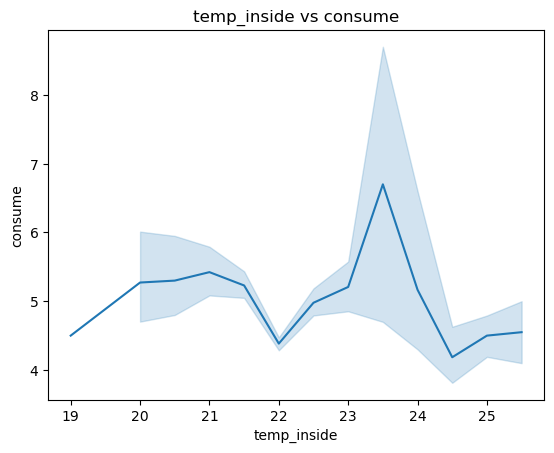

In [66]:
sns.lineplot(x="temp_inside", y="consume",data=df)
plt.title("temp_inside vs consume")

###  Hypothesis Testing - Does E10 gas type consume more than SP9B?

In [80]:
from scipy.stats import ttest_ind

e10 = df[df['gas_type'] == 'E10']['consume']
sp98 = df[df['gas_type'] == 'SP98']['consume']

# One-sided test:
# Null hypothesis or H0: E10 consume <= SP98 consume
# Alternative hyp or H1: E10 consume > SP98 consume

t_statistic, p_value = ttest_ind(e10, sp98, equal_var=False)

alpha = 0.05

if p_value <= alpha:
    print(f"p-value = {p_value:.4f}. Reject null hypothesis. E10 consume > SP98 consume.")
else:
    print(f"p-value = {p_value:.4f}. Fail to reject null hypothesis. Cannot conclude E10 consume > SP98 consume.")

p-value = 0.7547. Fail to reject null hypothesis. Cannot conclude E10 consume > SP98 consume.


### Modeling - Predicting Consumption

In [68]:
#get X and Y
X = df.drop(['consume'],axis=1)
y = df['consume']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [69]:
# Numericals split
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
display(X_train_num.head())

# Categoricals split
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)
display(X_train_cat.head())

,distance,speed,temp_inside,temp_outside
382,13.6,33,24.5,28
233,5.2,38,22.5,8
132,16.1,33,21.5,6
133,11.8,43,21.5,3
384,16.1,38,25.0,31


,gas_type,AC,rain,sun
382,SP98,0,0,1
233,SP98,0,0,0
132,SP98,0,0,0
133,SP98,0,0,0
384,SP98,1,0,0


In [70]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
X_train_num_standardized = transformer.transform(X_train_num)
X_train_num_standardized = pd.DataFrame(X_train_num_standardized, columns=X_train_num.columns, index = X_train_num.index)
display(X_train_num_standardized.head())

X_test_num_standardized = transformer.transform(X_test_num)
X_test_num_standardized = pd.DataFrame(X_test_num_standardized, columns=X_test_num.columns, index = X_test_num.index)

,distance,speed,temp_inside,temp_outside
382,0.057263,0.229730,0.846154,0.916667
233,0.018156,0.297297,0.538462,0.361111
132,0.068901,0.229730,0.384615,0.305556
133,0.048883,0.364865,0.384615,0.222222
384,0.068901,0.297297,0.923077,1.000000


In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='error').fit(X_train_cat)
hot_train_encoded = encoder.transform(X_train_cat).toarray()
hot_test_encoded = encoder.transform(X_test_cat).toarray()

cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
hot_train_cat = pd.DataFrame(hot_train_encoded, columns=cols, index = X_train_cat.index)
hot_test_cat = pd.DataFrame(hot_test_encoded, columns=cols, index = X_test_cat.index)

display(hot_train_cat.head())

,gas_type_SP98,AC_1,rain_1,sun_1
382,1.0,0.0,0.0,1.0
233,1.0,0.0,0.0,0.0
132,1.0,0.0,0.0,0.0
133,1.0,0.0,0.0,0.0
384,1.0,1.0,0.0,0.0


In [72]:
X_train = pd.concat((X_train_num_standardized,hot_train_cat),axis=1)
X_test = pd.concat((X_test_num_standardized,hot_test_cat),axis=1)

display(X_train.head())

,distance,speed,temp_inside,temp_outside,gas_type_SP98,AC_1,rain_1,sun_1
382,0.057263,0.229730,0.846154,0.916667,1.0,0.0,0.0,1.0
233,0.018156,0.297297,0.538462,0.361111,1.0,0.0,0.0,0.0
132,0.068901,0.229730,0.384615,0.305556,1.0,0.0,0.0,0.0
133,0.048883,0.364865,0.384615,0.222222,1.0,0.0,0.0,0.0
384,0.068901,0.297297,0.923077,1.000000,1.0,1.0,0.0,0.0


#### Define function to run all models (Regression)

In [73]:
def models_automation(models, X_tr, y_tr, X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [75]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]

models_automation(model_list, X_train, y_train, X_test, y_test)


LinearRegression: Train -> 0.2262863512086586, Test -> 0.1205770688982647
SGDRegressor: Train -> 0.040556381482036, Test -> -0.05829391300068876
KNeighborsRegressor: Train -> 0.42234497635543167, Test -> 0.1869370719584147
MLPRegressor: Train -> -0.44710561333043186, Test -> -0.46810348838741445
DecisionTreeRegressor: Train -> 0.9994097119989425, Test -> -0.010865853427178163
RandomForestRegressor: Train -> 0.9193281992788965, Test -> 0.6792363725265913


/Users/adeseye/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


As we can see after testing all the models, Random Forest Regressor does the best in predicting consumption with a test score of 0.67. We can focus on this model and try and improve it by tuning parameters

### Conclusion

With the information we have right now it is not straightforward to tell the best combustible. From the exploratory analysis they both seem to have a similar amount of consumption, with E10 being slighlty higher on average. The hypothesis test shows that we cannot reject null hypothesis, thereby we cannot conclude that E10 consumes more than SP98. For further work we can get more features for analysis and more data.